# HR Analytics Project- Understanding the Attrition in HR

Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Imported the entire dataset on this Jupyter Notebook with the help of pandas

In [4]:
df=pd.read_csv('HR Analytics Data.csv',sep='\t')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Checking the first 5 and last 5 rows of our entire dataset. We can see that our dataset comprises of total 1470 rows and 35 columns. The column "Attrition" is our label that needs to be predicted in assisting the HR professionals to understand what causes attrition in an organization and help them with retention process. Apart from the "Attrition" column right now all the remaining columns are our features that we will be using to generate our prediction. Since our label column is based upon binary classes this becomes a Classification problem!

# Exploratory Data Analysis (EDA)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Taking a look at all the 35 column names present in our dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Total columns --> 35

Integer datatype --> 26

Object datatype --> 09

We will need to treat the object datatype columns so that our machine learning model can understand the data since the acceptance of numerical data is mandatory

In [7]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Checking the total number of unique values present in each column be it categorical or numerical data

# Checking Missing Values

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

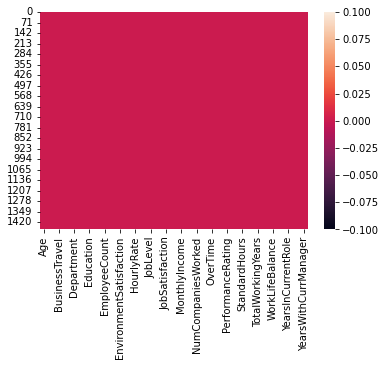

In [9]:
sns.heatmap(df.isnull())

There are no missing values in the dataset 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


With the help of decribe method in transpose format we are able to take a look at our column details clearly. The count column once again confirms that there are no missing data concern in our dataset. However if we check the min column we do notice columns with zero as their values. However considering the columns that have 0 value in them it is quite possible for freshers in an organisation to have them as 0 marked in their records.

Here we only get numerical data information therefore all the object datatype columns have been ignored.

In [11]:
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

I am dropping all the unwanted columns after careful observations done above.

EmployeeCount - All the rows in this column are filled with just a single number "1" which cannot provide much information related to attrition of an employee
EmployeeNumber - Since it is just a unique number provided to each employee that has nothing to do with attrition
Over18 - As per child labour law any person below the age of 18 is not eligible for employement in India and also this particular column has 1 single value for all the rows therefore it does not add much value considering the attrition of the employees
StandardHours - Again in this column we have single value for all the rows that is "80" hours as a standardized policy so does not make much difference with respect to attrition as there is no partiality in these terms on any employee

In [12]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
object_datatype

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

Here we have a list of all the 8 columns that hold object datatype that will need to be encoded into numerical format before creating our classification model.

In [13]:
integer_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'int64':
        integer_datatype.append(x)
integer_datatype

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Here we have a list of all the 23 columns that hold integer datatype that will comprise the numerical data part of our ML project

# Visualization

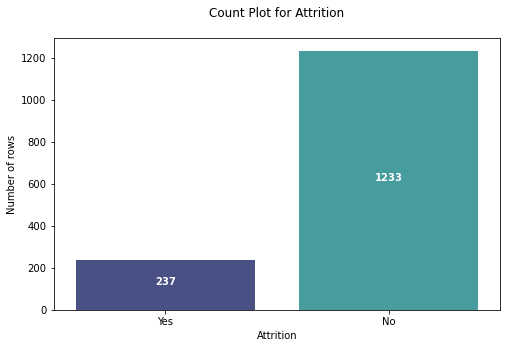

In [14]:
plt.figure(figsize=(8,5))
col_name = 'Attrition'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks
plt.show()

The attrition rate is = 237/1470 = 16.1 %.

This indicates that the data set is an imbalanced dataset where the number of observations 
belonging to class 1 (No) is significantly higher than those belonging to class 0 (True)

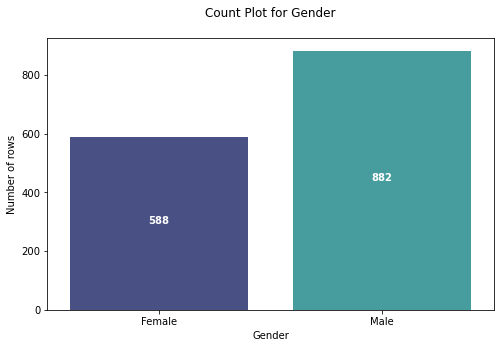

In [15]:
plt.figure(figsize=(8,5))
col_name = 'Gender'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks
plt.show()

In the Gender column we can see that the number of male employees is higher than the female employees. This is one of the situation in mostly all the organizational workforce across India

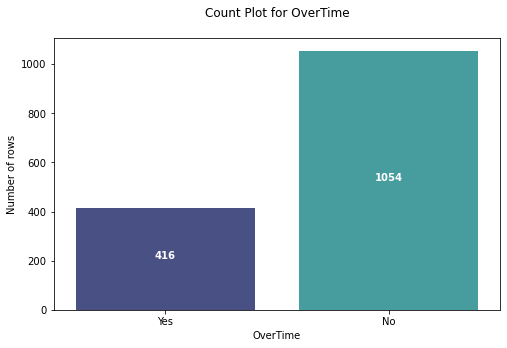

In [16]:
plt.figure(figsize=(8,5))
col_name = 'OverTime'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.show()

The OverTime column shows us the number of employees who do over time and the one's who do not. And it looks like from the above count plot that employees do not prefer doing over time in the company.

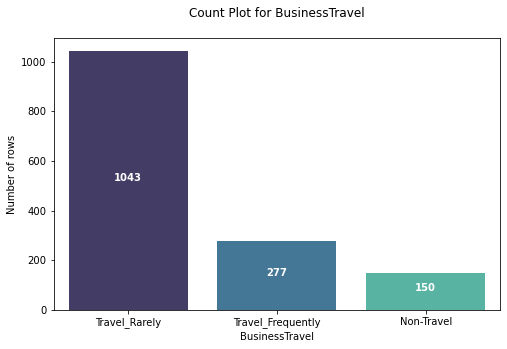

In [17]:
plt.figure(figsize=(8,5))
col_name = 'BusinessTravel'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks
plt.show()

In the BusinessTravel column we see a majority of number in the Travel_Rarely value while Non_Travel are the least of them

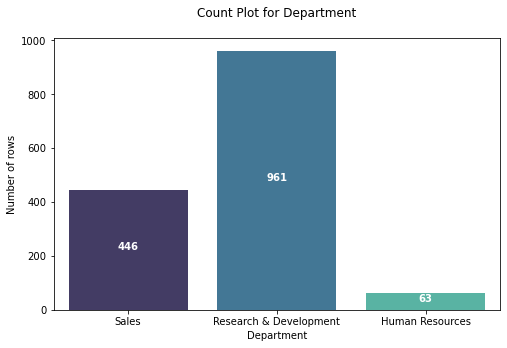

In [18]:
plt.figure(figsize=(8,5))
col_name = 'Department'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks
plt.show()

In the Department column we see lots of values for R&D department however the least number of employees are in HR since an organisation would need a limited number of Human Resources team it makes sense for it to have the least value

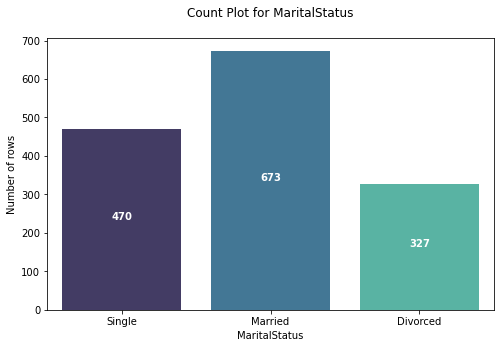

In [19]:
plt.figure(figsize=(8,5))
col_name = 'MaritalStatus'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks
plt.show()

In the MaritalStatus column plot we can see that the number of married employees is highest and the number of divorced employees is lowest.

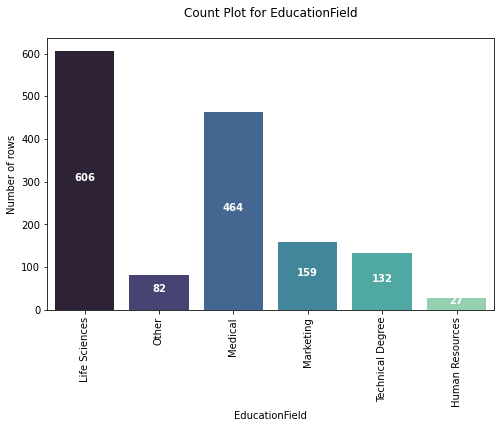

In [20]:
plt.figure(figsize=(8,5))
col_name = 'EducationField'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

For the EducationField column we have employees majorly from the Life Sciences educational background and the least from HR since that department needs lesser number of employees to contribute in the organization

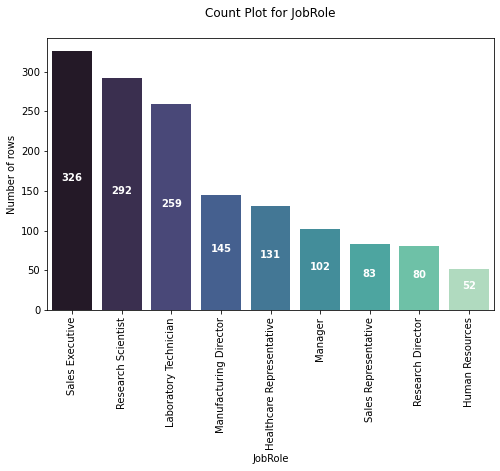

In [21]:
plt.figure(figsize=(8,5))
col_name = 'JobRole'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

Pertaining to the JobRole column we can see that the highest number is found in sales executive designation since they are the grass root level employees who are the most productive and handle the business value directly. And as notice in other plots we have the lowest number for HR roles as the employees present in that department are the lowest as well.

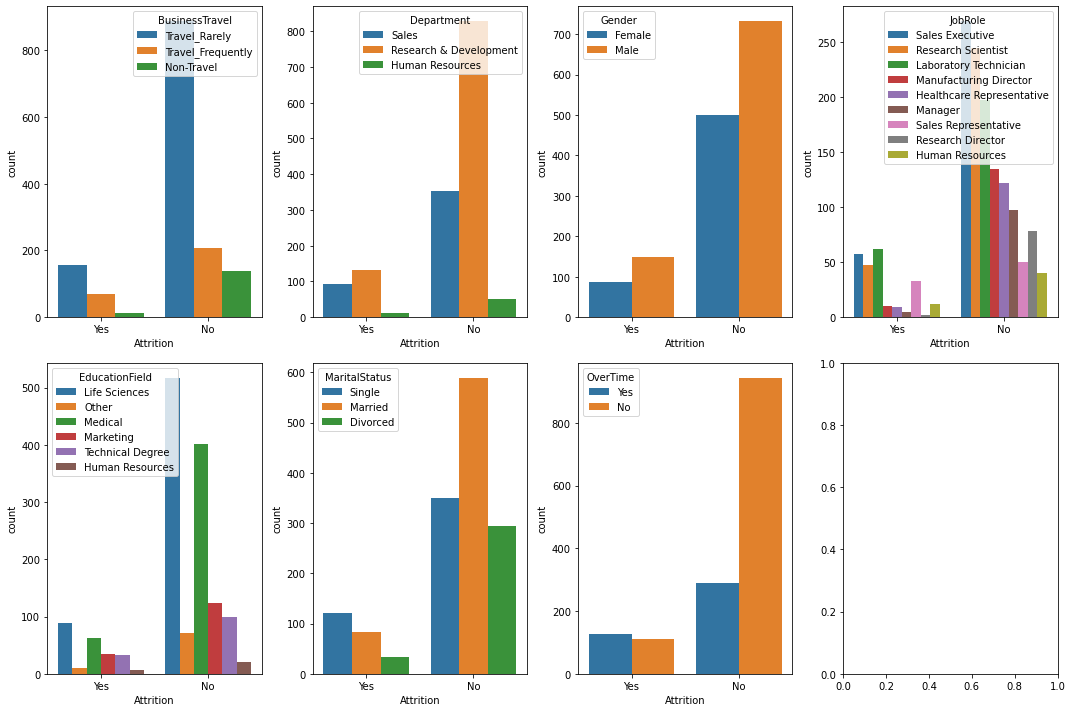

In [22]:
# visualization for non numerical features
fig,axss = plt.subplots(2,4, figsize=[15,10])
sns.countplot(x='Attrition', hue='BusinessTravel', data=df, ax=axss[0][0])
sns.countplot(x='Attrition', hue='Department', data=df, ax=axss[0][1])
sns.countplot(x='Attrition', hue='Gender', data=df, ax=axss[0][2])
sns.countplot(x='Attrition', hue='JobRole', data=df, ax=axss[0][3])
sns.countplot(x='Attrition', hue='EducationField', data=df, ax=axss[1][0])
sns.countplot(x='Attrition', hue='MaritalStatus', data=df, ax=axss[1][1])
sns.countplot(x='Attrition', hue='OverTime', data=df, ax=axss[1][2])
plt.tight_layout()

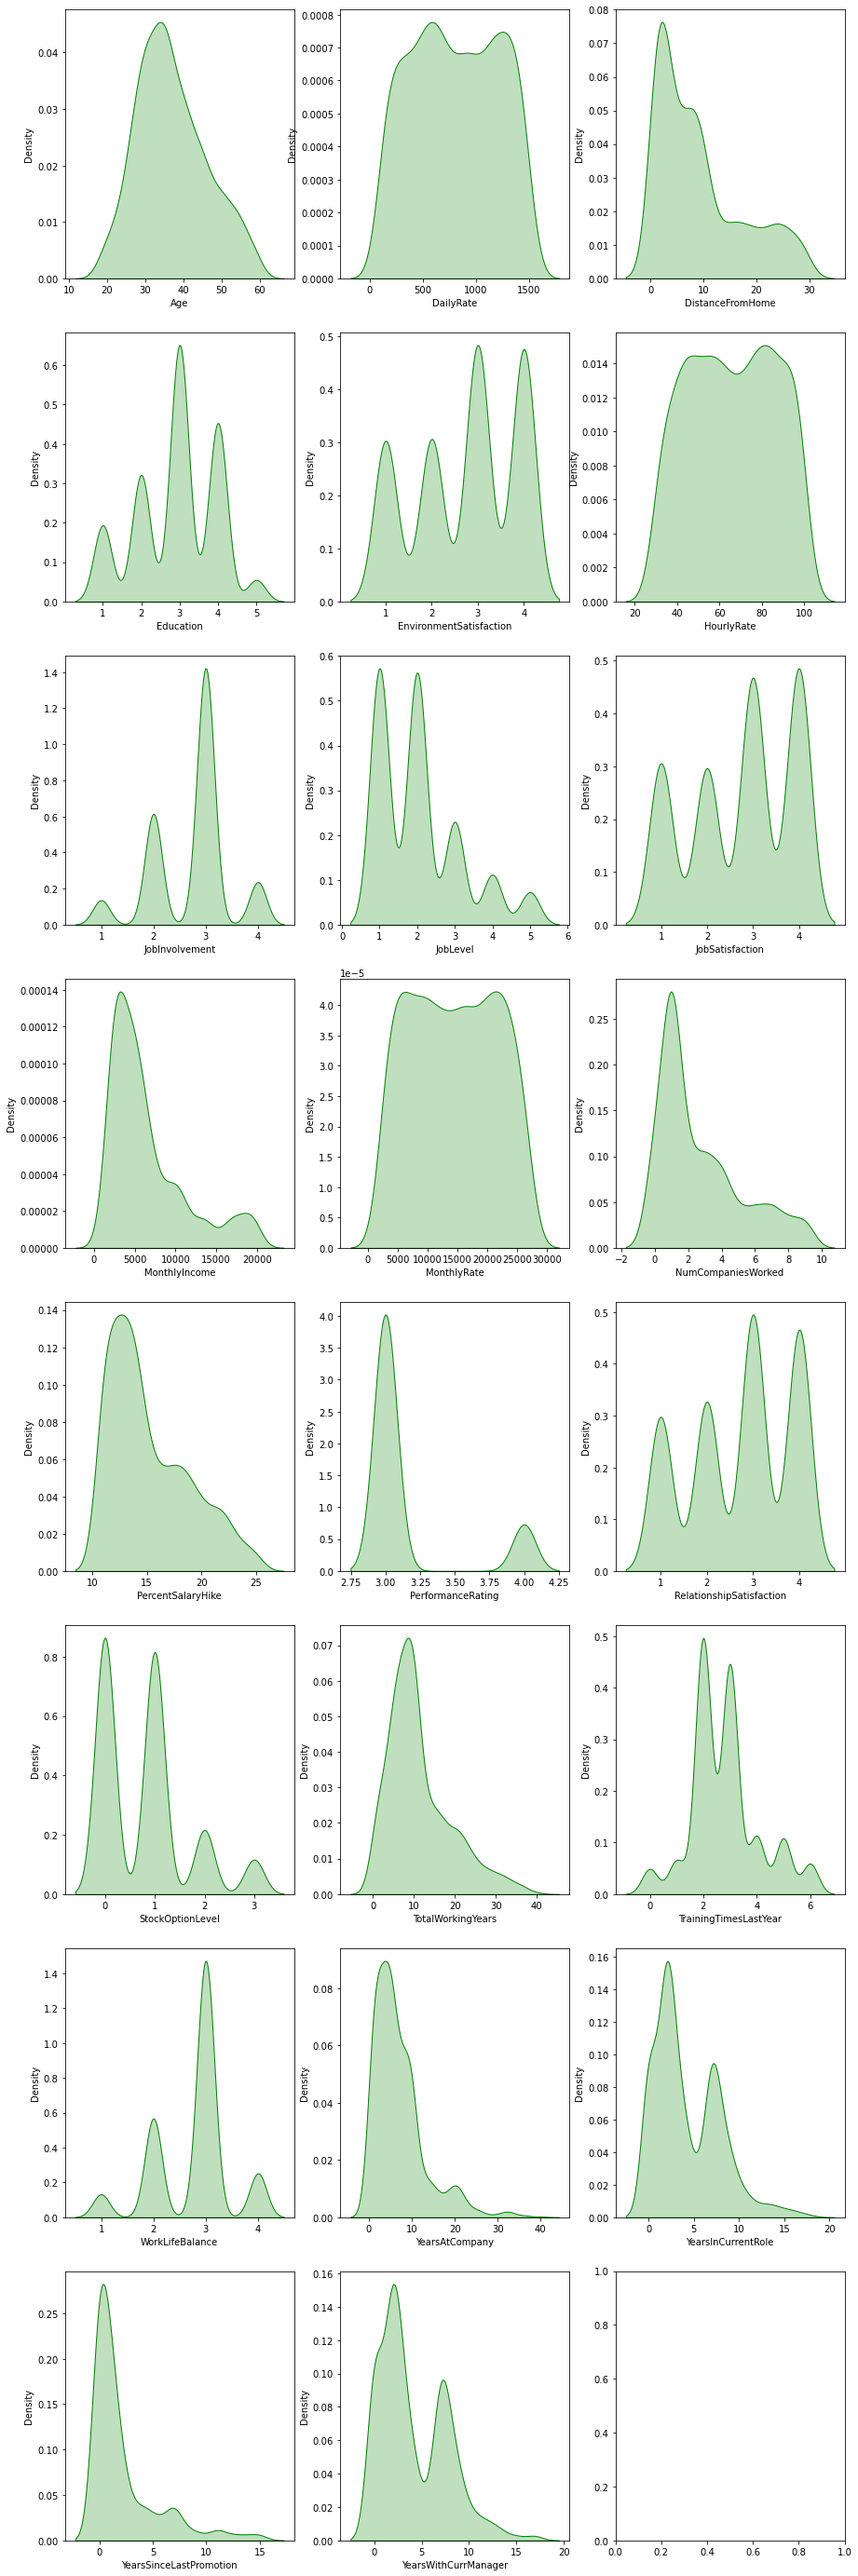

In [23]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True},norm_hist=True)
    index += 1
plt.show()

With the help of above distribution plot we are able to see some skewness present in few columns that will need to be handled as well.

DistanceFromHome

MonthlyIncome

NumCompaniesWorked

PercentSalaryHike

TotalWorkingYears

TrainingTimesLastYear

YearsAtCompany

YearsInCurrentRole

YearsSinceLastPromotion

YearsWithCurrManager

Above columns are showing some visible skewness mostly right skewed data presence.

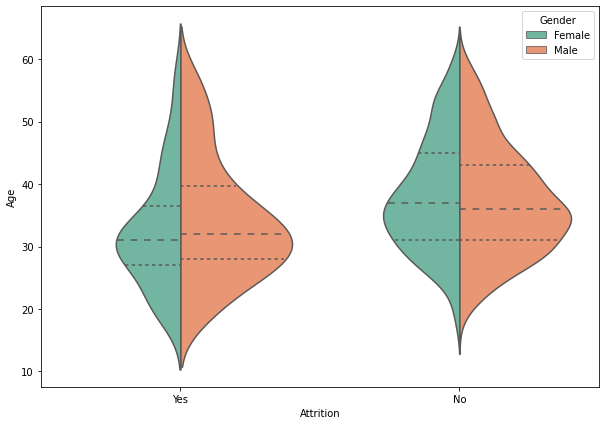

In [24]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="Age", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In the above violin plot we see that the Attrition counts both in male and female are high when the are in their mid 20's and 30's of age.

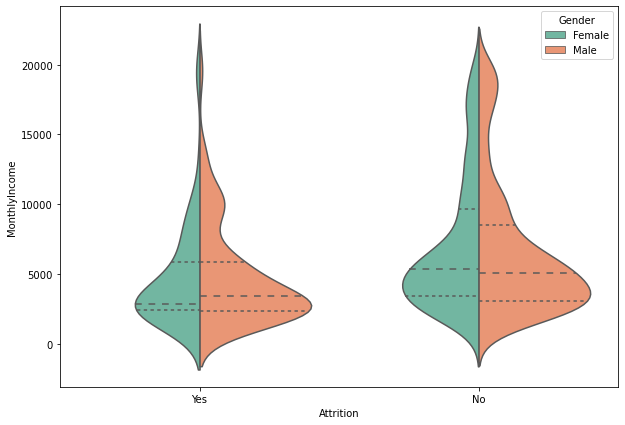

In [25]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="MonthlyIncome", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In the above plot we can see that the Attrition peaks for both male and female employees when the monthly income is less than 5000.

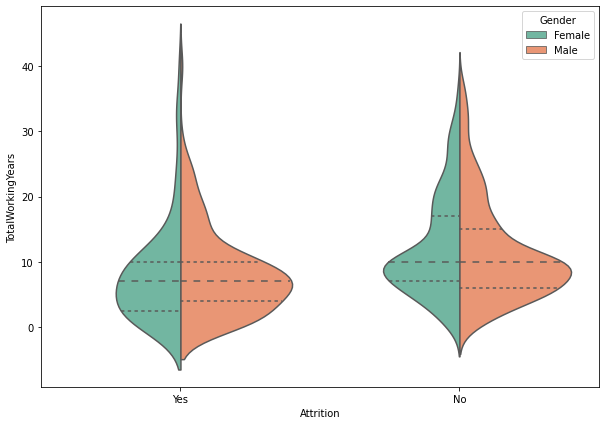

In [26]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="TotalWorkingYears", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In the above violin plot we notice that the Attrition for both male ad female employees occur when they are in their experience range of 1-10 years

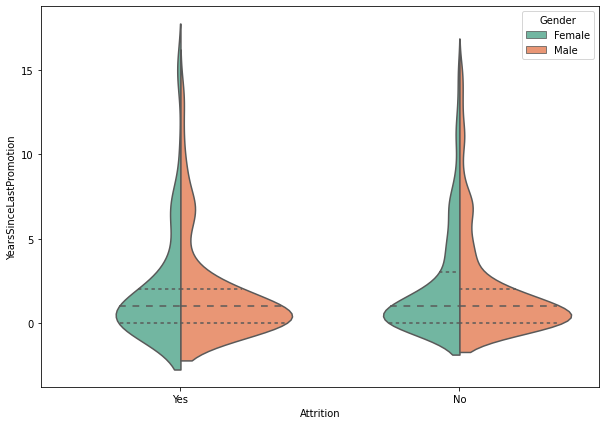

In [27]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="YearsSinceLastPromotion", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In the above plot we see that the Attrition for both make and female employees happen when they do not see prootions happening after years of gaining experience.

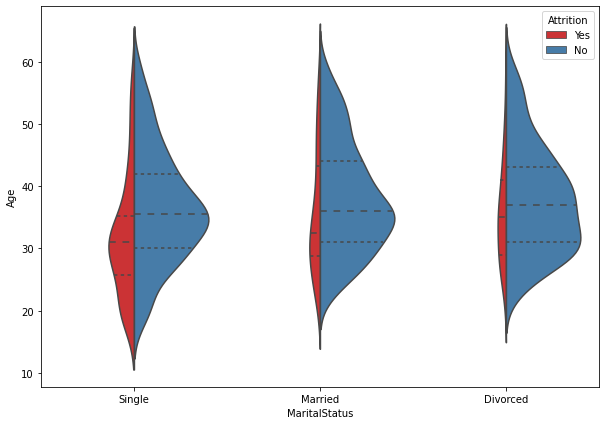

In [28]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Age", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

In the above violin plot we can see that the Attrition rate is quite less in employees when they are married or divorced as compared to when they are single and have lesser responsibilities to deal with at their age

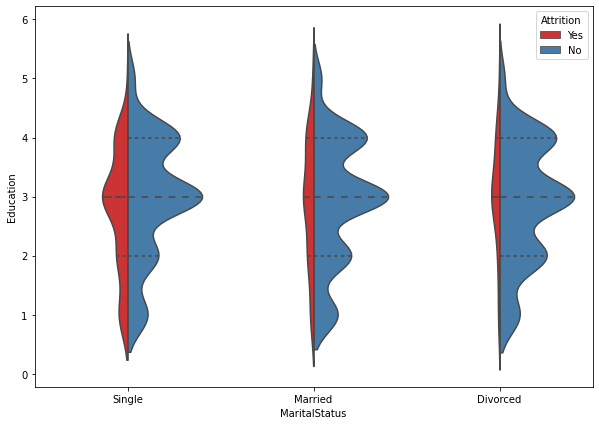

In [29]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Education", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

In the above plot we notice that once again employees who are married or divorced and with good education choose stability in life rather than the one's who are single and are okay to take risks and oppotunities in life

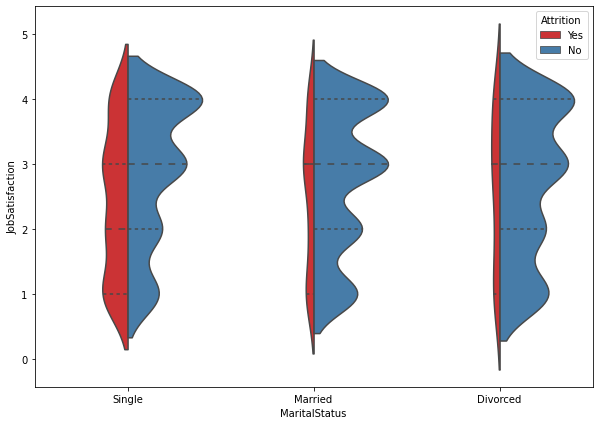

In [30]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="JobSatisfaction", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

In the above voilin part we can see that the job satisfaction part for singles is not that great compared to employees who are married or divorced may be due to the year of experience difference that makes a huge gap in pay scale. But we do otice stability and lesser attrition rate amongst employees who are married or divorced

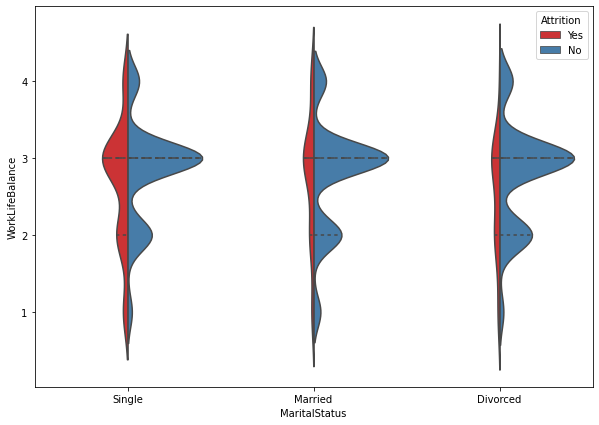

In [31]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="WorkLifeBalance", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

In the above plot we can see that Work Life balance maintained by singles are quite less therefore there are attritions observed as they have to achieved lots of skills to get better in their career.

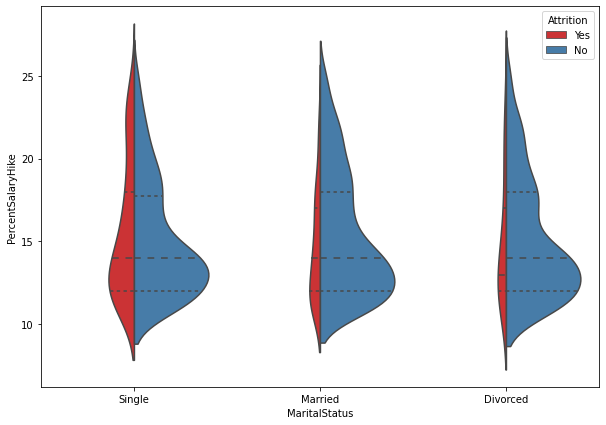

In [32]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="PercentSalaryHike", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

In the above violin plot we can see that the Percent Salary Hike plays a major role when it come to Attrition amongst the Singles as comapred to their married or divorced counterparts

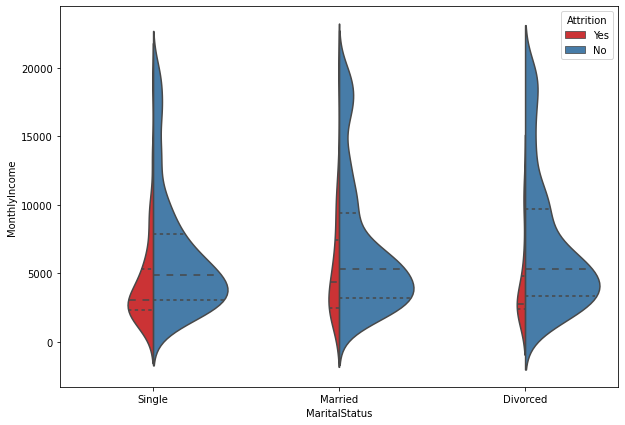

In [33]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="MonthlyIncome", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

If monthly income is less than 5000 then irresptive of maritial status attrition is high in each case

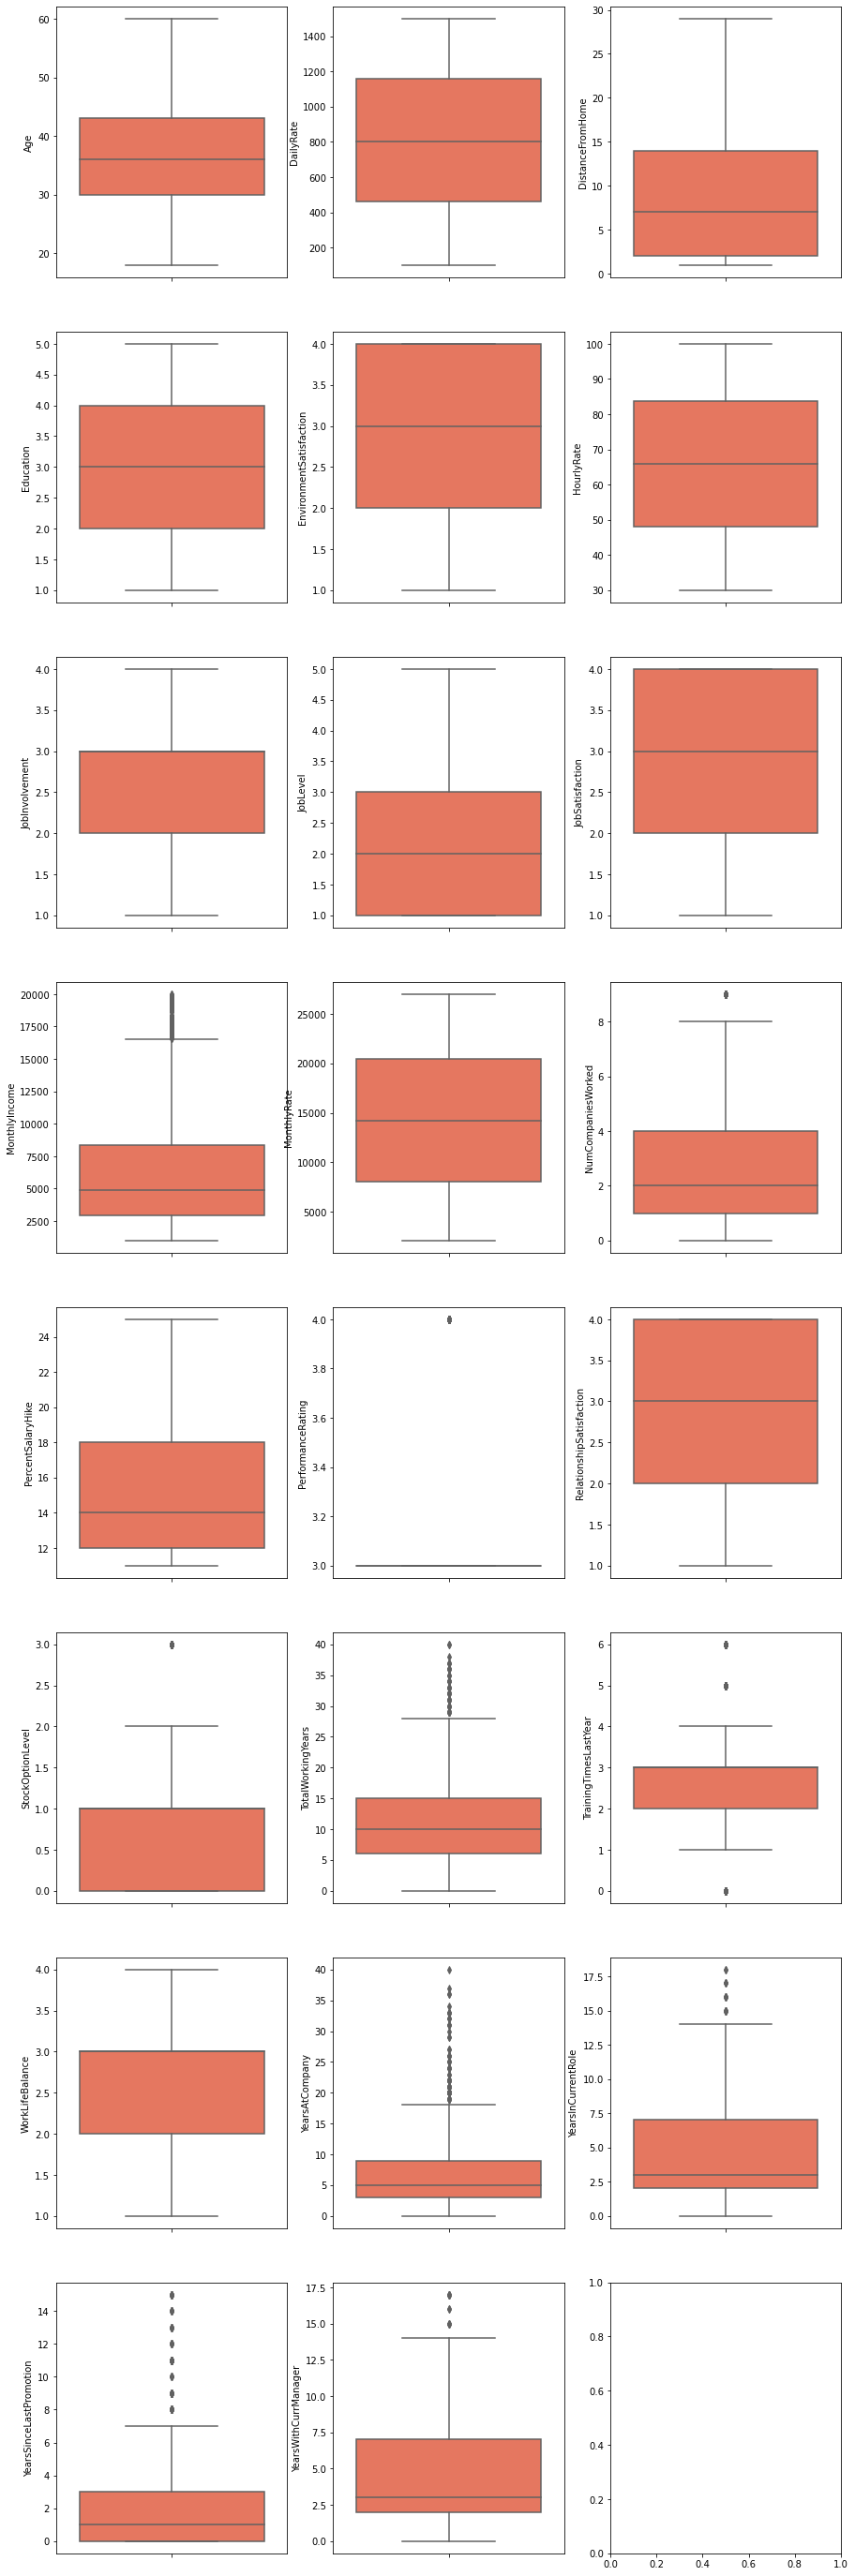

In [34]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Reds")
    index += 1
plt.show()

We have created a box plot visual for all our integer datatype columns to check for outliers. We do see some of the columns where there are presence of outliers and we will need to treat it accordingly.

MonthlyIncome

NumCompaniesWorked

PerformanceRating

StockOptionLevel

TotalWorkingYears

TrainingTimesLastYear

YearsAtCompany

YearsInCurrentRole

YearsSinceLastPromotion

YearsWithCurrManager

All the above columns show visible outlier details

# Encoding the categorical object datatype columns

In [35]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2



I am using Label Encoder on our target column since we want our labels to be converted from the object datatype to numerical datatype

In [37]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

We can see that our target label has been successfully updated into numerical format containing binary values of 0 and 1 where 1 shows Attrition Yes and 0 shows Attrition No

In [38]:
le=LabelEncoder()
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'].values.reshape(-1,1))
df['Department'] = le.fit_transform(df['Department'].values.reshape(-1,1))
df['EducationField'] = le.fit_transform(df['EducationField'].values.reshape(-1,1))
df['Gender'] = le.fit_transform(df['Gender'].values.reshape(-1,1))
df['JobRole'] = le.fit_transform(df['JobRole'].values.reshape(-1,1))
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'].values.reshape(-1,1))
df['OverTime'] = le.fit_transform(df['OverTime'].values.reshape(-1,1))

In [39]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In the above dataframe we can clearly see that all our object datatype columns are now converted to numerical datatype which can be used in our machine learning models

In [40]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

All the columns dtypes has been converted into integer types

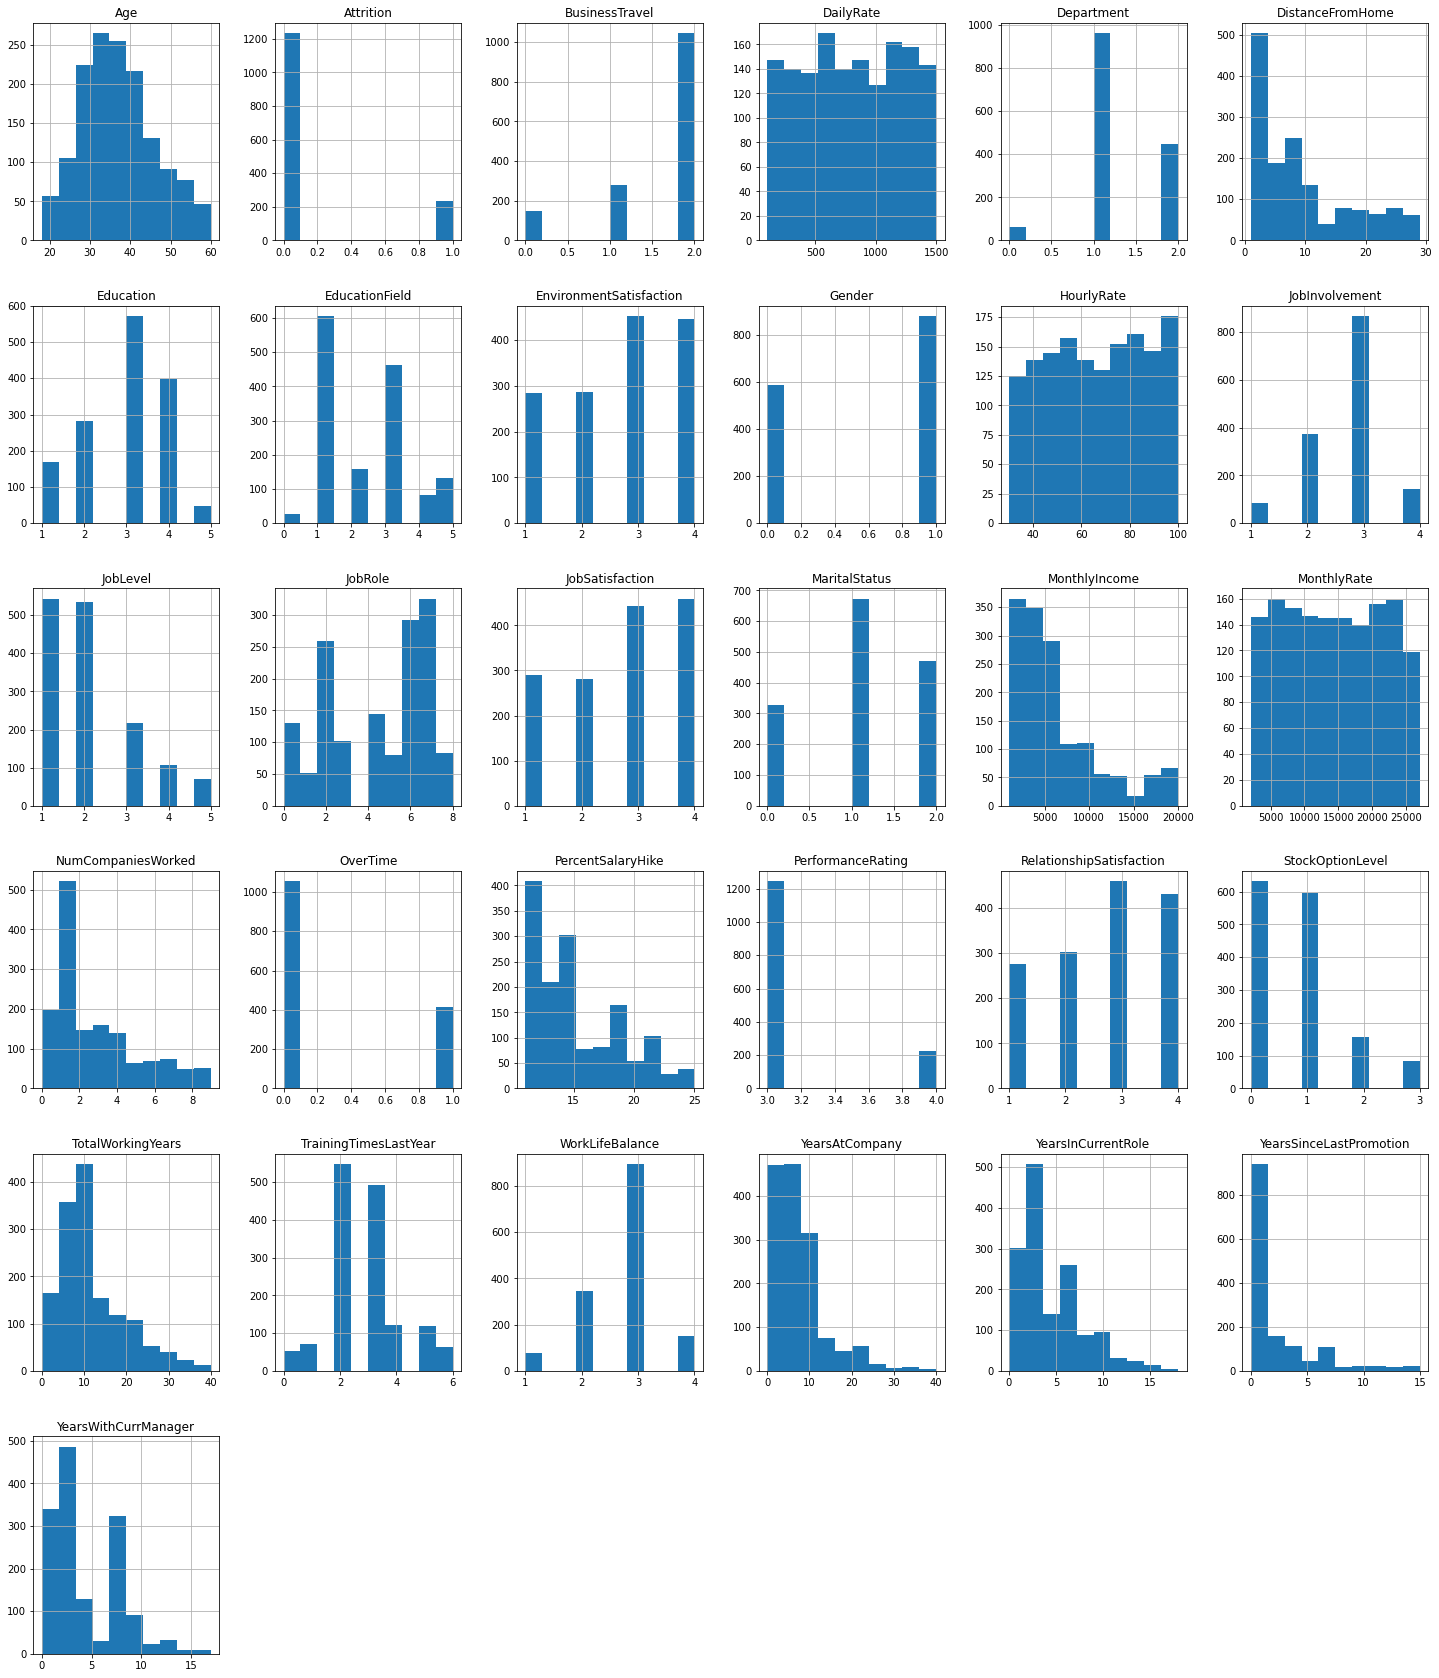

In [41]:
df.hist(figsize=(25,30))
plt.show()

Using the above histogram we are able to plot all the columns of are dataset post application of encoding technique where we do not have any object datatype columns anymore.

In [42]:
# check correlation between numerical features and target variable
corr = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']].corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840


<function matplotlib.pyplot.show(close=None, block=None)>

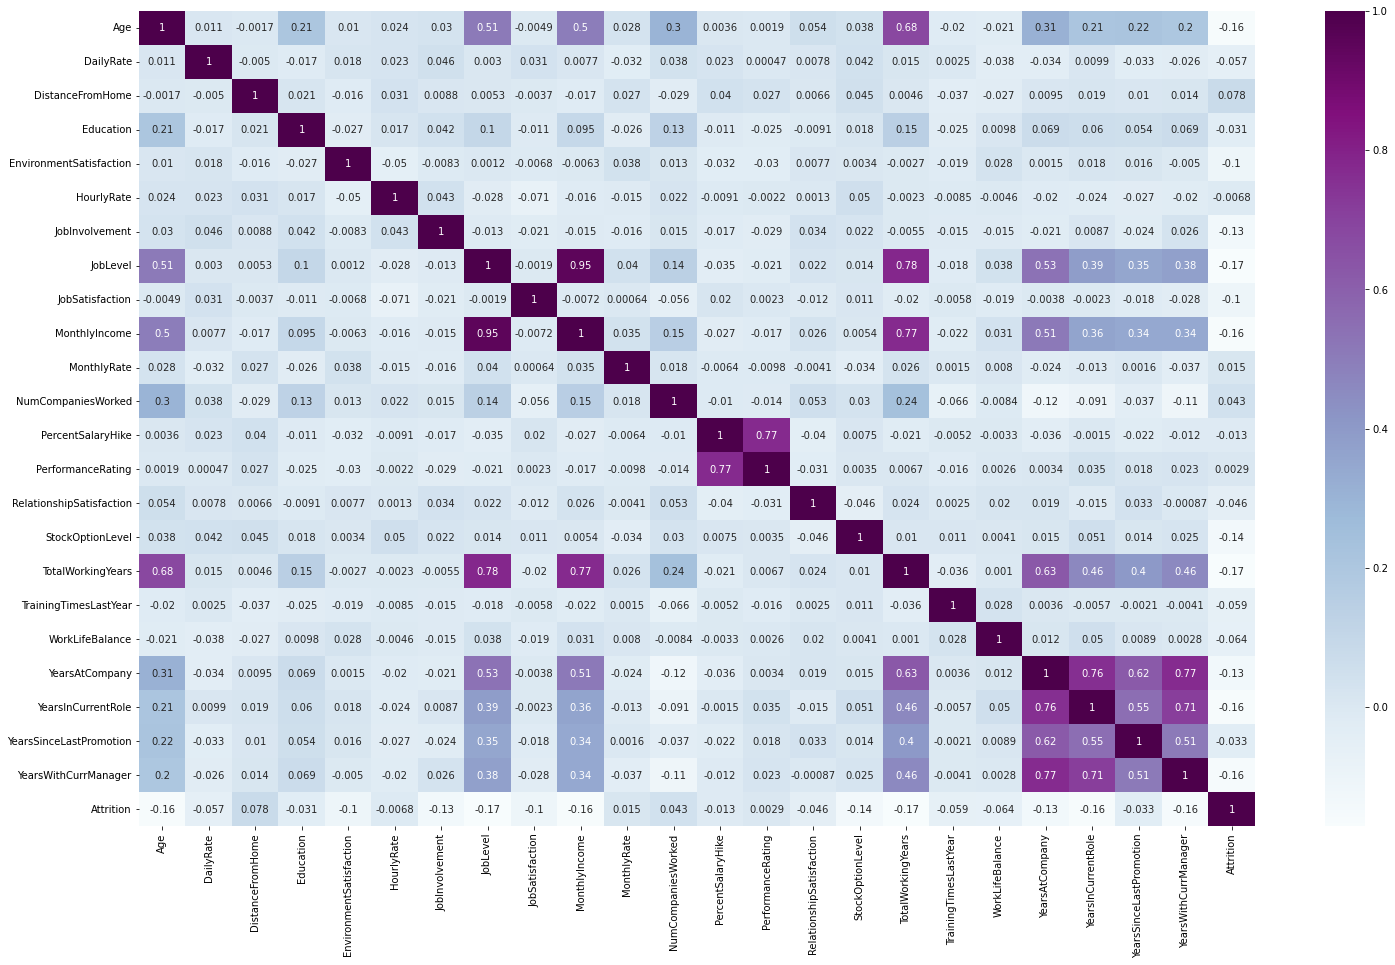

In [43]:
# visualization of correlation relationships
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot=True,cmap="BuPu")
plt.show

In the above heatmap we can see that our target label "Attrition" has both positive and negative correlations with the feature columns. Also we see very less or negligible amount of multi colinearity so we will not have to worry about it. Since the one's which are reflecting the value are inter dependent on those feature columns and I intend to retain and keep them

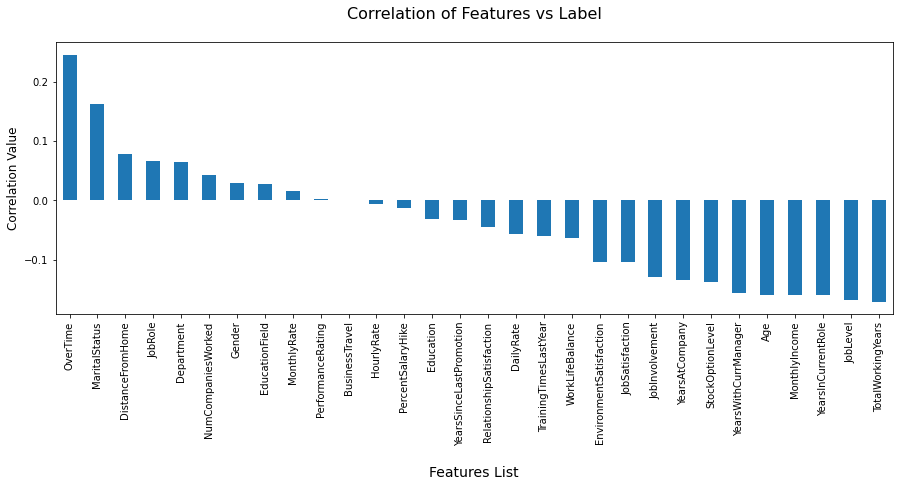

In [44]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['Attrition'].sort_values(ascending=False).drop('Attrition').plot.bar()
plt.title("Correlation of Features vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In the above Bar Plot we are able to clearly define the feature columns that are positively correlated with our label and the feature columns that are negatively correlated with our label.

# Using Z Score to remove outliers

In [45]:
from scipy.stats import zscore

In [46]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [47]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


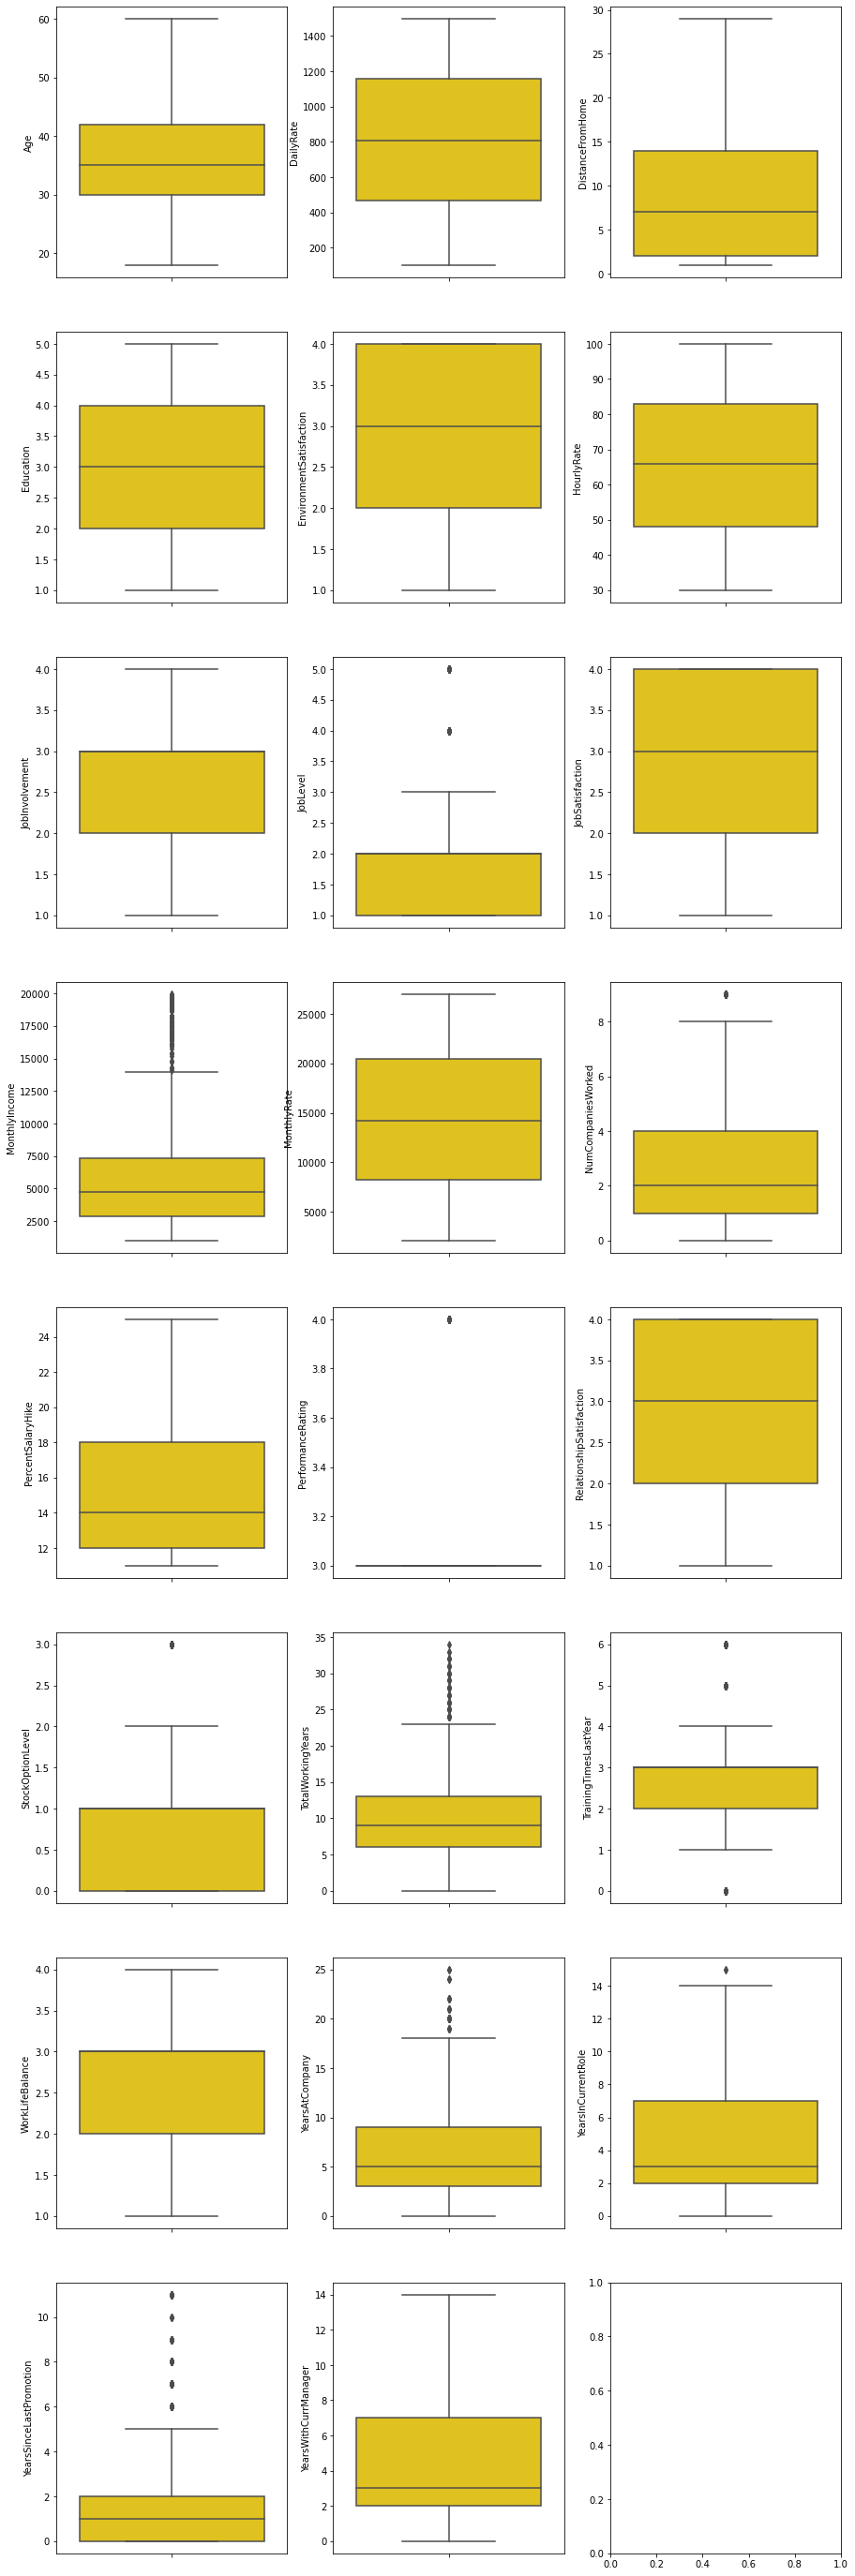

In [48]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="prism")
    index += 1
plt.show()

In the above box plot we can see that whatever outliers we could have afforded to lose from our numerical columns we have gotten rid of it. There are still presence of outliers but since they are in continous format we shall ignore it

# Checking Skewness

In [49]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value

# Using Log Transform to fix skewness

In [50]:
for col in integer_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

I have applied Log Transformation on our numerical integer datatype columns to ensure that we do not have skewness in our dataset.


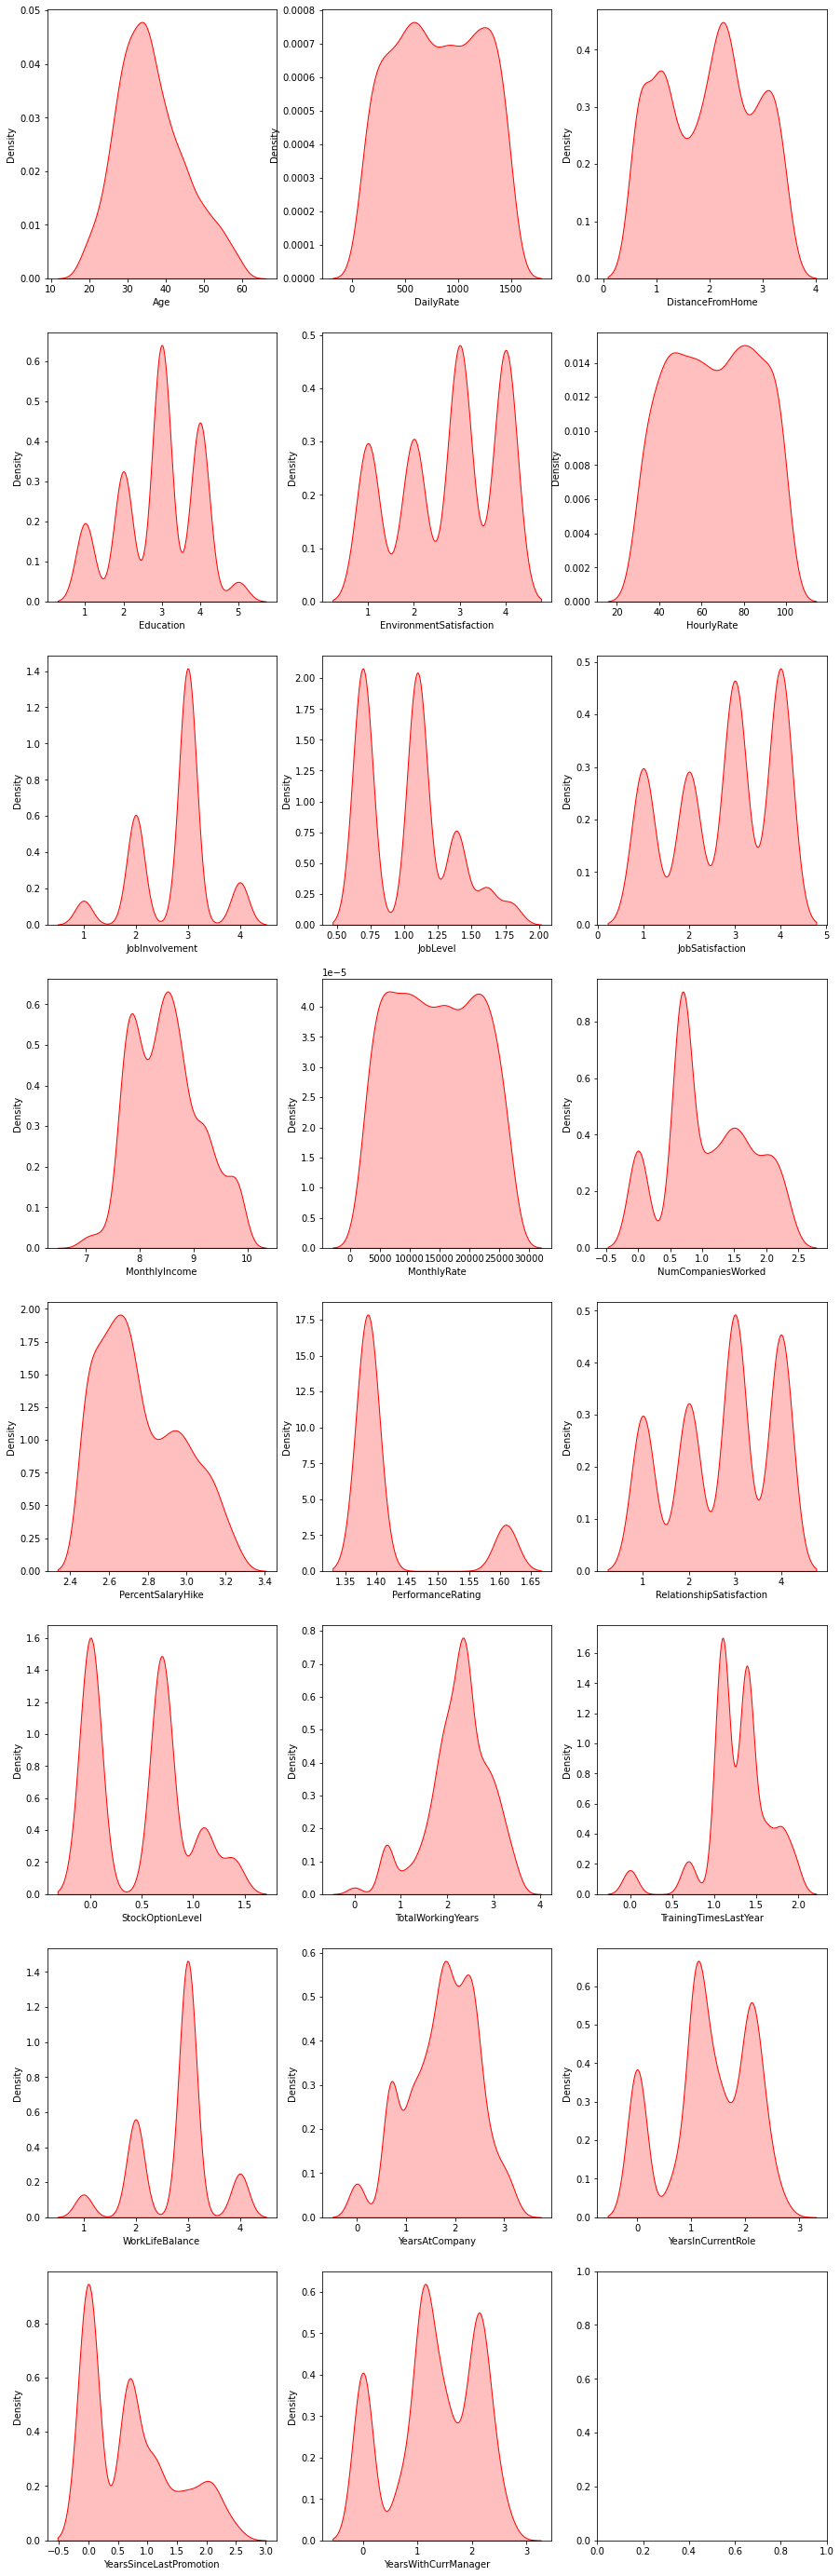

In [51]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.show()

We have managed to reduce the skewness from our numerical columns and that can be seen in the above distribution plot as well

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [52]:
X = df.drop('Attrition', axis=1)
Y = df['Attrition']

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column

In [53]:
X.shape

(1387, 30)

In [54]:
Y.shape

(1387,)

# Resolving the class imbalance issue in label column

In [55]:
Y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [58]:
Y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category

# Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.713308,0.762567,0.841457,1.624360,-1.686255,-0.759334,-0.923435,-0.445640,-1.057799,1.490863,...,-0.472655,-1.421575,-0.948126,0.156789,-3.464662,-2.121271,0.496659,0.570632,-0.984711,0.828664
1,1.639914,-0.749510,-1.301809,-0.353567,0.192053,-1.799936,-0.923435,0.485021,0.945359,-0.266469,...,2.460916,1.409351,0.655599,0.451438,0.369637,0.556039,1.150626,1.199580,0.012605,1.201035
2,0.250006,0.762567,1.547199,-0.353567,-1.179906,-0.759334,1.470605,1.415682,0.945359,1.384358,...,-0.472655,-0.477933,-0.948126,-0.016154,0.369637,0.556039,-2.318837,-1.583079,-0.984711,-1.490566
3,-0.213297,-0.749510,1.596679,-0.353567,-0.820646,1.321870,-0.923435,1.415682,-1.057799,-0.532732,...,-0.472655,0.465709,-0.948126,0.156789,0.369637,0.556039,0.860280,1.199580,1.009920,-1.490566
4,-0.908252,0.762567,-0.489295,-0.353567,-1.179906,-1.799936,0.672591,-1.376301,0.945359,-1.384772,...,-0.472655,1.409351,0.655599,-0.212220,0.369637,0.556039,-0.729278,-0.112942,0.595997,-0.068537


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value

# Creating the training and testing data sets

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [62]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 87.06896551724138 on Random State 583


# Machine Learning Model for Classification with Evaluation Metrics

In [63]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=869)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_train
    pred_train = model.predict(X_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    #Training Accuracy Score
    training_acc = (accuracy_score(Y_train, pred_train))*100
    print("Training accuracy score:", training_acc)
    
    # Testing Accuracy Score
    testing_acc = (accuracy_score(Y_test, pred))*100
    print("\nTesting accuracy score:", testing_acc)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)
    
    # ROC AUC Score
    roc_score=roc_auc_score(Y_test,pred)
    print('\nroc auc score ',roc_score)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function

In [64]:
# Logistic Regression

lg=LogisticRegression()
classify(lg, X, Y)

Training accuracy score: 81.8077144502015

Testing accuracy score: 85.146804835924

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       289
           1       0.85      0.85      0.85       290

    accuracy                           0.85       579
   macro avg       0.85      0.85      0.85       579
weighted avg       0.85      0.85      0.85       579

Cross Validation Score: 80.74802636478736

Accuracy Score - Cross Validation Score is 4.165766738660906

roc auc score  0.851467605297697


In [65]:
# Support Vector Classifier

svc=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(svc, X, Y)

Training accuracy score: 95.91249280368451

Testing accuracy score: 89.29188255613127

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       289
           1       0.90      0.88      0.89       290

    accuracy                           0.89       579
   macro avg       0.89      0.89      0.89       579
weighted avg       0.89      0.89      0.89       579

Cross Validation Score: 87.18496313398376

Accuracy Score - Cross Validation Score is -2.2711700305354867

roc auc score  0.892942369645627


In [66]:
# Decision Tree Classifier
dtc=DecisionTreeClassifier(criterion='gini',random_state=21,min_samples_leaf=5, max_depth=15)
classify(dtc, X, Y)

Training accuracy score: 93.14910765687968

Testing accuracy score: 84.6286701208981

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       289
           1       0.84      0.86      0.85       290

    accuracy                           0.85       579
   macro avg       0.85      0.85      0.85       579
weighted avg       0.85      0.85      0.85       579

Cross Validation Score: 80.1469054889402

Accuracy Score - Cross Validation Score is 4.7668876145080645

roc auc score  0.8462713280038181


In [67]:
# Random Forest Classifier

rfc=RandomForestClassifier(max_depth=15, random_state=111)
classify(rfc, X, Y)

Training accuracy score: 100.0

Testing accuracy score: 91.8825561312608

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       289
           1       0.96      0.87      0.92       290

    accuracy                           0.92       579
   macro avg       0.92      0.92      0.92       579
weighted avg       0.92      0.92      0.92       579

Cross Validation Score: 89.64884188575259

Accuracy Score - Cross Validation Score is -4.735048782304318

roc auc score  0.9189058584894403


In [68]:
# GaussianNB Classifier

nb = GaussianNB()
classify(nb,X,Y)

Training accuracy score: 77.31721358664365

Testing accuracy score: 78.58376511226253

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       289
           1       0.78      0.80      0.79       290

    accuracy                           0.79       579
   macro avg       0.79      0.79      0.79       579
weighted avg       0.79      0.79      0.79       579

Cross Validation Score: 77.11979593356669

Accuracy Score - Cross Validation Score is 7.793997169881578

roc auc score  0.7858191146641212


In [69]:
# K Neighbors Classifier

knc=KNeighborsClassifier(n_neighbors=15)
classify(knc, X, Y)

Training accuracy score: 80.65630397236615

Testing accuracy score: 79.62003454231433

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.65      0.76       289
           1       0.73      0.94      0.82       290

    accuracy                           0.80       579
   macro avg       0.82      0.80      0.79       579
weighted avg       0.82      0.80      0.79       579

Cross Validation Score: 78.3275303492962

Accuracy Score - Cross Validation Score is 6.586262754152074

roc auc score  0.7959432048681541


In [70]:
# Extra Trees Classifier

etc=ExtraTreesClassifier()
classify(etc, X, Y)

Training accuracy score: 100.0

Testing accuracy score: 93.26424870466322

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       289
           1       0.95      0.92      0.93       290

    accuracy                           0.93       579
   macro avg       0.93      0.93      0.93       579
weighted avg       0.93      0.93      0.93       579

Cross Validation Score: 91.84618678781561

Accuracy Score - Cross Validation Score is -6.932393684367341

roc auc score  0.9326691325617467


In [71]:
# Grandient Boosting Classifier

gbc = GradientBoostingClassifier()
classify(gbc, X, Y)

Training accuracy score: 96.71848013816926

Testing accuracy score: 90.50086355785838

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       289
           1       0.93      0.88      0.90       290

    accuracy                           0.91       579
   macro avg       0.91      0.91      0.90       579
weighted avg       0.91      0.91      0.90       579

Cross Validation Score: 87.49273851195353

Accuracy Score - Cross Validation Score is -2.5789454085052625

roc auc score  0.9050590621644194


In [72]:
estimator=[]
estimator.append(('svc',SVC()))
estimator.append(('dtc',DecisionTreeClassifier()))
estimator.append(('rfc',RandomForestClassifier()))

In [73]:
estimator

[('svc', SVC()),
 ('dtc', DecisionTreeClassifier()),
 ('rfc', RandomForestClassifier())]

In [74]:
vtc = VotingClassifier(estimators=estimator,voting='hard')
classify(vtc,X,Y)

Training accuracy score: 100.0

Testing accuracy score: 91.36442141623489

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       289
           1       0.94      0.89      0.91       290

    accuracy                           0.91       579
   macro avg       0.91      0.91      0.91       579
weighted avg       0.91      0.91      0.91       579

Cross Validation Score: 89.25979369926267

Accuracy Score - Cross Validation Score is -4.346000595814402

roc auc score  0.9136916835699797


# Hyper parameter tuning - Decision tree classifier

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
params_dtc = {'criterion' : ["gini", "entropy"],
              'splitter' : ["best", "random"],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [4, 6, 8],
              'random_state' : [42, 111, 759]
             }

In [77]:
GSCV = GridSearchCV(DecisionTreeClassifier(), params_dtc, cv=5)

In [78]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 4],
                         'random_state': [42, 111, 759],
                         'splitter': ['best', 'random']})

In [79]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 2,
 'random_state': 759,
 'splitter': 'best'}

In [80]:
dtc_Model = DecisionTreeClassifier(criterion="gini", max_depth=8, min_samples_split=2, 
                                     random_state=111, splitter="best")
Classifier = dtc_Model.fit(X_train, Y_train)
dtc_pred = dtc.predict(X_test)
dtc_acc = (accuracy_score(Y_test, dtc_pred))*100
print("Accuracy score for the Best Model is:", dtc_acc)

Accuracy score for the Best Model is: 91.37931034482759


# Hyper parameter tuning - Random forest classifier

In [81]:
# hyperparameter tuning for random forest
params_rf = {
    'n_estimators': [20,40,60,80],
    'min_samples_split':[4,6,8],
    'max_depth': [1, 5, 10, 15],
    'max_features': ['sqrt', 'auto','log2']
            }

In [82]:
grid_rf = GridSearchCV(rfc, params_rf, cv=5)

In [83]:
grid_rf.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=15, random_state=111),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [20, 40, 60, 80]})

In [84]:
grid_rf.best_params_

{'max_depth': 15,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 60}

In [85]:
rfc_Model = RandomForestClassifier(max_depth=10,max_features='sqrt',min_samples_split=4,n_estimators=80)
rfc_Classifier = rfc_Model.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = (accuracy_score(Y_test, rfc_pred))*100
print("Accuracy score for the Best Model is:", rfc_acc)

Accuracy score for the Best Model is: 97.84482758620689


# AUC ROC Curve

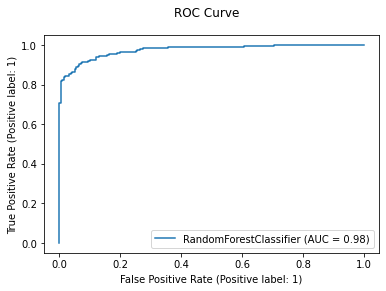

In [86]:
disp = metrics.plot_roc_curve(rfc_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

I have generated the ROC Curve for my final model and it shows the AUC score for my final model to be of 98%

# Confusion Matrix

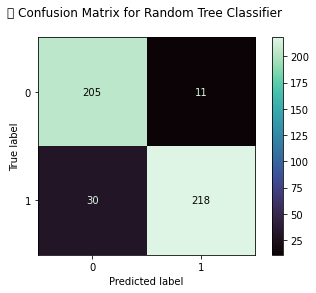

In [89]:
class_names = df.columns
metrics.plot_confusion_matrix(rfc_Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Random Tree Classifier \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my model missed to provide the correct prediction (depicting in the black boxes)

# Saving the best model

In [90]:
import joblib
filename = "FinalModel_E03.pkl"
joblib.dump(rfc_Model, filename)

['FinalModel_E03.pkl']